<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выгрузка" data-toc-modified-id="Выгрузка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выгрузка</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание проекта

**Выбор локации для скважины**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**  
 - id — уникальный идентификатор скважины;
 - f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
 - product — объём запасов в скважине (тыс. баррелей).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Прекрасное вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!
    
Спасибо, что есть оглавление в плагине toc - по проекту удобно перемещаться:)

## Загрузка и подготовка данных

### Выгрузка 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

Переменные которые пригодятся при расчетах

In [2]:
BUDGET = 10000000000
COST_PER_WELL = 450000
COUNT_WELL = 500
BEST_COUNT_WELL = 200
SCALE = 1000000
STATE = 46812

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Я вижу, исполнение твоего кода начинается в ячейке с номером, который отличается от единицы. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).

![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)
        
Такая проверка поможет тебе убедиться, что твоё решение будет должным образом воспроизведено во время ревью или во время передачи его заказчику - это очень важный этап, пренебрегать которым не стоит:)
        
В рамках ревью я перезапустил ядро на своей стороне для проверки воспроизводимости решения, но на будущее, пожалуйста, не забывай про это:)
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

Загружаем данные и посмотрим на них

In [3]:
df_1 = pd.read_csv("/datasets/geo_data_0.csv")
df_2 = pd.read_csv("/datasets/geo_data_1.csv")
df_3 = pd.read_csv("/datasets/geo_data_2.csv")

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные подгрузили.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе отойти от прописывания путей к файлу (а локальные директории могут меняться часто в зависимости от пользователя) и перейти к автоматическому определению пути к файлу с помощью модуля `path`. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
В нём мы указываем только непосредственно директорию с файлом, а уже путь к ней модуль `path` определит самостоятельно.
</div>

In [4]:
display(df_1.info())
df_1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
53865,ow0ht,0.722931,0.597966,-1.866162,81.430994
42988,QxTYb,1.933473,0.406093,6.268289,142.993312
52255,aQ8mh,0.518534,0.883576,1.661044,113.642224
66304,lTQTw,-0.224591,0.926484,3.430363,40.647453
60149,IpaLd,-0.975329,0.203362,-1.196341,26.770577
4576,xFDLR,0.275328,-0.223530,6.798409,163.170477
29265,tCiFT,0.214123,0.075463,3.781904,89.439517
10111,07MPJ,-0.877888,0.642304,-2.371227,33.229880
14621,fRb9r,0.532866,-0.555283,-0.772725,134.291717
83702,uPJAO,0.657665,-0.594009,-2.677424,57.111722


In [5]:
display(df_2.info())
df_2.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
13941,eW9rS,5.285080,-4.746408,5.009535,134.766305
42807,RpleZ,10.184731,4.864445,2.002105,53.906522
94416,kFqeE,-3.766118,-5.876031,2.001118,57.085625
27563,5MoTz,-10.178553,-8.361312,1.005797,30.132364
33691,Botli,16.461479,-5.461124,1.007467,26.953261
61904,9Trv6,4.804530,-0.846866,5.003852,134.766305
75089,XscRG,-2.526815,-5.384115,2.007274,57.085625
92092,cZZyf,1.788562,5.160559,3.997880,107.813044
3985,k4NE5,10.954069,-5.883128,5.005929,134.766305
94327,UjLWe,16.388319,-11.374945,1.002173,26.953261


In [6]:
display(df_3.info())
df_3.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
95449,hoEx9,2.403211,-2.028414,5.665747,114.455205
89334,KXUQ5,-0.271104,-0.491727,4.340372,84.501475
64965,WSXge,1.159578,2.697677,1.518757,85.640048
27026,lJkwY,2.524366,5.137356,-1.944222,129.100945
37541,1jzck,-1.549485,-1.125568,7.925536,105.665699
23863,0c1fH,0.578429,0.668130,3.336047,159.960634
69654,zHbof,1.557621,-1.007747,-2.421276,18.259952
13901,6T81d,1.482910,-1.663030,4.600103,181.932186
62874,CYDjA,-2.500850,-2.020389,7.727112,133.706492
20519,4TNJ8,-0.589250,2.453988,4.605091,43.282118


По выведенным даным, видим что все три таблицы одного размера, данные приведены к одному типу, нету пропусков.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Осмотрели данные: вывели случайные 10 строк, посмотрели на общую информацию о таблицах - хорошо! 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Давай сделаем небольшой вывод по итогу этой проверки?
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

In [7]:
df_1.duplicated().sum()

0

In [8]:
df_2.duplicated().sum()

0

In [9]:
df_3.duplicated().sum()

0

In [10]:
for df in [df_1, df_2, df_3]:
    display(len(df['id'].unique()))

99990

99996

99996

В первой таблице есть 10 повторений, а во второй и третей по 4. Оставим только не повторяющиеся данные.

In [11]:
for df in [df_1, df_2, df_3]:
    df = df.drop_duplicates(subset=['id'])
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


None

In [12]:
df_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
df_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
df_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Все лишнее убрано. Пропуски в данных отсутствуют.

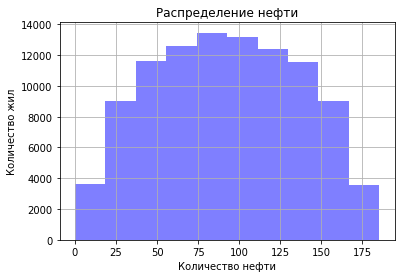

In [15]:
plt.xlabel("Количество нефти")
plt.ylabel("Количество жил")
plt.title("Распределение нефти")
df_1["product"].hist(alpha = .5, color='b')
plt.show()

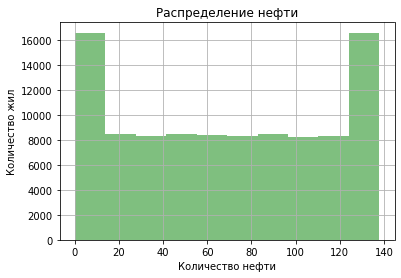

In [16]:
plt.xlabel("Количество нефти")
plt.ylabel("Количество жил")
plt.title("Распределение нефти")
df_2["product"].hist(alpha = .5, color='g')
plt.show()

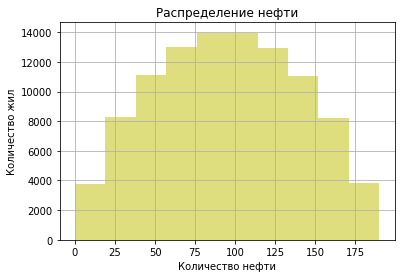

In [17]:
plt.xlabel("Количество нефти")
plt.ylabel("Количество жил")
plt.title("Распределение нефти")
df_3["product"].hist(alpha = .5, color='y')
plt.show()

In [18]:
df_1.loc[:,"f0":"product"].corr().style.background_gradient(axis=0)

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [19]:
df_2.loc[:,"f0":"product"].corr().style.background_gradient(axis=0)

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [20]:
df_3.loc[:,"f0":"product"].corr().style.background_gradient(axis=0)

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


По двум графикам можно понять что:
1. Нефть во втором регионе в среднем меньше чем в первом и третьем.
2. Нефть во втором регионе распределено линейно, не считая двух больших выбросо в начала и конце. По этому же мы и видим очень сильную корреляцию с признаком f2, кажется что во втором регионе он диминирующий.
2. Корреляция количества нефти и признаков сильнее всего с признаком f2, признаки f1 и f0 так же влияют на ее количество, но не так сильно.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Явные дубликаты проверили - отлично!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Блок первичного анализа данных следует дополнить несколькими важными шагами:
1. Проверка пропущенных значений с помощью метода `.isna()`, а дополнив его методом `.sum()`, мы посчитаем количество пропусков в разрезе столбцов таблица.
2. Проверка неявных дубликатов: в каждой таблице столбец `id` описывает идентификатор скважины. Предполагается, что в каждом регионе должны быть уникальные скважины. Давай проверим, нет ли в регионах скважин с одинаковым идентификатором?
3. Важно визуализировать распределение целевого признака в каждом регионе - это поможет нам понять особенности концентрации сырья в каждом регионе. Результаты визуализации стоит сопоставить между регионами - будут ли все три региона схожи между собой по распределению сырья? Или, может, для каких-то регионов будут особенности в распределении?
4. Важно провести корреляционный анализ: так как по условию проекта мы ограничены применением только линейной регрессии, важной становится проблема мультиколлинераности - это ситуация, при которой между обучающими признаками есть сильная линейная зависимость, которая к тому же выше, чем линейная зависимость между каждым из этих признаков с целевым признаком по отдельности. В таком случае обычно удаляют какой-то из созависимых обучающих признаков, чаще - тот, связь которого с целевым признаком слабее. Давай попробуем проверить наши данные на мультиколлинеарность? Для подсчёта матрицы корреляций можно использовать метод `.corr()`, а красиво визуализировать матрицу корреляций можно с помощью библиотеки `seaborn` - тут есть пара хороших примеров: https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii.
    
При работе с графиками важно соблюдать следующие правила:
1. Стоит подписать названия осей X и Y.
2. Также стоит дать название графику.
3. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать: это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод `plt.show()`.
4. Стоит оптимизировать график по размеру: не стоит делать графики слишком маленькими, но и перебарщивать с размером, чтобы график в ячейке приходилось скроллить, тоже не стоит. Дефолтный размер графика почти всегда не самый оптимальный, поэтому его стоит оптимизировать всегда:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Считаю `.isna()` лишним, по скольку метод `.info()` нам уже дает значения по пропускам
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено почти всё.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Соглашусь с твоей логикой, что пропуски видны из `.info()`, но тут важно не упускать несколько моментов:
1. Этот метод приемлем, когда у тебя таблица с небольшим количеством столбцов. Когда их будет несколько десятков, а то и сотен, этим методом пропуски уже не проверишь.
2. Пользователем твоего отчёта зачастую будет не только техническая команда, которая умеет читать `.info()`, но и бизнес-заказчики, которым желательно все метрики подписать - и то не факт, что потом увидят и не спросят "а пропуски-то есть или нет"? :D
    
В целом, колбасу и топором можно нарезать, но зачем, если есть специально обученный нож?:) Так же и в анализе данных.
        
Но окей, это не критикал, поэтому исправление оставлю тебе на откуп:)
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

С этой точки зрения я об этом не думал, вынужден с тобой согласиться)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Окей:)
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
А вот пара вещей требует корректировки:
1. Наслоенное друг на друга распределение сырья в регионах мешает улавливать особенности в каждом из них. В частности, довольно необычное распределение во втором регионе потерялось на фоне более нормальных первого и третьего. Лучше делать для каждого региона отдельный график.
2. Матрицу корреляций нашёл только для второго региона - стоит сделать также и для первого с третьим.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

###  Подготовка 

Создадим необходимые выборки для оьучения модели.

In [21]:
train_1, test_1 = train_test_split(df_1.loc[:,"f0":"product"], test_size=.25, random_state=STATE)
train_2, test_2 = train_test_split(df_2.loc[:,"f0":"product"], test_size=.25, random_state=STATE)
train_3, test_3 = train_test_split(df_3.loc[:,"f0":"product"], test_size=.25, random_state=STATE)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Сплитование данных выполнено корректно, размер тестовой выборки соблюдён.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Параметр `random_state` стоит также оформить как константу.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Окей!
</div>

In [22]:
train_1_features = train_1.drop(["product"], axis= 1)
train_1_ans = train_1["product"]
train_2_features = train_2.drop(["product"], axis= 1)
train_2_ans = train_2["product"]
train_3_features = train_3.drop(["product"], axis= 1)
train_3_ans = train_3["product"]
test_1_featires = test_1.drop(["product"], axis= 1)
test_1_ans = test_1["product"]
test_2_featires = test_2.drop(["product"], axis= 1)
test_2_ans = test_2["product"]
test_3_featires = test_3.drop(["product"], axis= 1)
test_3_ans = test_3["product"]

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Так делать не стоит: в каждом регионе могут быть свои особенности распределения сырья, поэтому важно обучать индивидуальные модели для каждого региона - в твоём случае мы можем ухудшить качество модели для региона, так как смешаем распределение целевого признака текущего региона с распределением целевого признака в соседних регионах.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

### Вывод

 Данные загружены, пропусков нет, как и потворений данных.  
 Подготовлены выборки для обучения модели.  
 Можно двигаться дальше.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Есть промежуточный вывод - хорошо!
</div>

## Обучение и проверка модели

Приступаем к обучению модели.

In [23]:
%%time
warnings.filterwarnings("ignore")
model_LR_1 = LinearRegression()
model_LR_1.fit(train_1_features, train_1_ans)

CPU times: user 478 µs, sys: 12 ms, total: 12.5 ms
Wall time: 10.3 ms


LinearRegression()

In [24]:
%%time
warnings.filterwarnings("ignore")
model_LR_2 = LinearRegression()
model_LR_2.fit(train_2_features, train_2_ans)

CPU times: user 8.42 ms, sys: 93 µs, total: 8.51 ms
Wall time: 7.03 ms


LinearRegression()

In [25]:
%%time
warnings.filterwarnings("ignore")
model_LR_3 = LinearRegression()
model_LR_3.fit(train_3_features, train_3_ans)

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 9.37 ms


LinearRegression()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Обучили модель линейной регрессии - хорошо!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Корректнее будет обучать модели для каждого региона отдельно, не объелиняя тестовые выборки.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

Теперь можно предсказать где сколько нефти.

In [26]:
test_1["predict"] = model_LR_1.predict(test_1_featires)

In [27]:
test_2["predict"] = model_LR_2.predict(test_2_featires)

In [28]:
test_3["predict"] = model_LR_3.predict(test_3_featires)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Сделали предсказания запасов сырья в каждом регионе - хорошо!
</div>

Посчитаме среднее фактическое, предсказаное и RMSE.

In [29]:
display("Район №1")
display(f"Фактическое количество нефти: {test_1['product'].mean()}")
display(f"Предсказаное количество нефти: {test_1['predict'].mean()}")
display(f"RMSE: {mean_squared_error(test_1['product'], test_1['predict']) ** 0.5}")

'Район №1'

'Фактическое количество нефти: 92.60899133761362'

'Предсказаное количество нефти: 92.22748940211034'

'RMSE: 37.73223742654144'

In [30]:
display("Район №2")
display(f"Фактическое количество нефти: {test_2['product'].mean()}")
display(f"Предсказаное количество нефти: {test_2['predict'].mean()}")
display(f"RMSE: {mean_squared_error(test_2['product'], test_2['predict']) ** 0.5}")

'Район №2'

'Фактическое количество нефти: 68.8694300319281'

'Предсказаное количество нефти: 68.86192881385603'

'RMSE: 0.8874738755744914'

In [31]:
display("Район №3")
display(f"Фактическое количество нефти: {test_3['product'].mean()}")
display(f"Предсказаное количество нефти: {test_3['predict'].mean()}")
display(f"RMSE: {mean_squared_error(test_3['product'], test_3['predict']) ** 0.5}")

'Район №3'

'Фактическое количество нефти: 95.10114297343036'

'Предсказаное количество нефти: 94.95318209291585'

'RMSE: 40.405787939219984'

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Стоит добавить подписи данных для метрик, которые выводятся на печать.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Для расчёта `RMSE` 2 и 3 регионов использованы таргеты из 1 региона.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

###  Вывод

Из-за особенности распределения нефти во втором регионе, модель почти идеально пресказыват ее, чего не скажешь о первом и третьем там ошибка в среденм на 38 едениц.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Сделан промежуточный вывод - отлично!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Вывод нужно будет скорректировать по итогу исправления ошибки с объединением данных для обучения - он круто изменится:)

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Среднее стало ближе, а вот ошибка больше, также не знаю что лучше)
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Всё ещё есть ошибки, вывод после их исправления покажется ещё более забавным:)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

## Подготовка к расчёту прибыли

In [32]:
PRODUCT_COUNT = BUDGET/COST_PER_WELL
PRODUCT_COUNT_FOR_ONE = PRODUCT_COUNT/BEST_COUNT_WELL

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Задали несколько важных констант - отлично!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Несколько рекомендаций по работе с константами:
1. Согласно стандарту написания кода <a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>PEP 8</a> константы следует задавать в верхнем регистре.
2. Обычно константы принято объявлять в начале проекта - отлично подойдёт ячейка, следующая за ячейкой импорта библиотек.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Нам пригодятся ещё и другие константы: 
- бюджет на разработку региона;
- количество доступных точек для разработки в регионе;
- количество лучших точек в регионе, которые мы выбираем для разработки в регионе;
- цена единцы продукции.

Давай добавим эти константы?

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

In [33]:
display(f'Среднее количество нефти для одной скважини для окупания: {PRODUCT_COUNT_FOR_ONE}')
display(f"Среднее предсказаное количество нефти в регионе 1: {test_1['predict'].mean()}")
display(f"Среднее предсказаное количество нефти в регионе 2: {test_2['predict'].mean()}")
display(f"Среднее предсказаное количество нефти в регионе 3: {test_3['predict'].mean()}")

'Среднее количество нефти для одной скважини для окупания: 111.11111111111111'

'Среднее предсказаное количество нефти в регионе 1: 92.22748940211034'

'Среднее предсказаное количество нефти в регионе 2: 68.86192881385603'

'Среднее предсказаное количество нефти в регионе 3: 94.95318209291585'

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Оценили запас сырья, необходимый для безубыточной работы в регионе - хорошо!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Стоит добавить подписи данных для метрик, которые выводятся на печать.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Объём сырья для безубыточной работы нужно сравнивать со средним запасом сырья не на правильных ответах, а на предсказанных значениях - в реальном проекте правильных ответов мы не знаем, поэтому работать можем только с предсказанными, а также именно на предсказанных значениях мы и будем дальне принимать решения.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

In [34]:
def count_risk(target):
    state = np.random.RandomState(STATE)
    values = []
    for i in range(1000):
        target_sam = target.sample(COUNT_WELL, 
                                   random_state = state, replace=True).sort_values(by = "predict", 
                                                                     ascending = False).head(BEST_COUNT_WELL)
        values.append(target_sam['product'].sum() * COST_PER_WELL - BUDGET)
    values = pd.Series(values)
    display(f"Риск не окупить бюджет: {round(values.loc[values < 0].count()/values.count()*100,1)}%")
    display(f"Доверительный интервал (в млн.)")
    display(round(values.quantile(.025) / SCALE,3))
    display(round(values.quantile(.975) / SCALE,3))
    display(f"Среднее значение {round(values.mean() / SCALE,3)}млн.")

### Вывод

В среденм нужно 111 едениц нефти со скважины что-бы строительство окупилось. Среднее значения по регионам ниже необходимного, но это среднее по 25к скважинам, следовательно должны быть скважины в которых нефти достаточно. По этому дальше используем бутстрап для дальнейшей оценки рисков и прибыли.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Среднего запаса сырья в каждом регионе недостаточно для безубыточной работы - окей!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

В целом верно, но я бы чуть изменил формулировку: сважины не должны быть, скорее, в каждом регионе есть скважины как с низким, так и с высоким запасом сырья, и мы равновероятно можем угодить как в ту, как и в другую. Поэтому нам важно оценить прибыль и риски работы в регионах, используя технику бутстрапирования.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Функция для расчёта прибыли не написана.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

## Расчёт прибыли и рисков 

Для начала посмотрим на прибыль если брать все скважины и предсказания модели.

In [35]:
test_1_sort = test_1.sort_values(by = "predict", ascending = False)
test_2_sort = test_2.sort_values(by = "predict", ascending = False)
test_3_sort = test_3.sort_values(by = "predict", ascending = False)

In [36]:
test_1_200 = test_1_sort.head(200)
test_2_200 = test_2_sort.head(200)
test_3_200 = test_3_sort.head(200)

In [37]:
display(f'Максимально возможная прибыль по проедсказанию (в млн.)')
display(f'Регион №1 {round((test_1_200["product"].sum()*450000 - BUDGET) / SCALE,3)}')
display(f'Регион №2 {round((test_2_200["product"].sum()*450000 - BUDGET) / SCALE,3)}')
display(f'Регион №3 {round((test_3_200["product"].sum()*450000 - BUDGET) / SCALE,3)}')

'Максимально возможная прибыль по проедсказанию (в млн.)'

'Регион №1 3132.06'

'Регион №2 2415.087'

'Регион №3 2395.894'

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Стоит добавить подписи данных для метрик, которые выводятся на печать.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
    
Пара важных моментов:
    
1. Тут посчитана не прибыль, а доход. Чтобы получить прибыль, от дохода следует отнять затраты - в нашем случае это расходы на разработку региона.
    
2. Также здесь и далее в функции расчёта прибыли и рисков стоит перейти к более читабельным цифрам - хотя бы к миллионам, можно к миллиардам. Просто рубли в контексте таких больших сумм воспринимать довольно сложно.
    
3. Оценка прибыли "в лоб" здесь не будет очень корректным решением: беря просто 200 лучших точек по предикту, мы рискуем взять 200 худших точек в реальном бизнесе. Именно поэтому при бутстрапировании 200 лучших точек отбираются случайно. Поэтому текущий расчёт прибыли несколько оторван от бизнес-составляющей - его в целом можно удалить.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

Если из 25к скважин выбрать 200 самых лучших (по предсказанию), то все три региона окупятся.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Пара некритических замечаний:
1. Параметры количеста точек для сэмплирования, количества лучших точек и стоимости продута задаются руками - стоит использовать константы.
2. Вывод интервала в виде `а-в` не очень читабелен, если оба конца интервала будут отрицательными, к примеру `-10.03213412--5.123135124` - выглядит не очень:) Поэтому значения стоит округлить и визуально разделить. Можно даже отдельно печатать нижнюю и верхнюю границы интервала на разных строках.
3. `pass` в конце цикла функции не нужно - этот оператор используется в циклах как команда для продолжения цикла в случае справедливости каких-то условий. Функцию стоит завершать оператором `return`, если она что-то возвращает, а если ничего не возвращает - можно не использовать операторы. `pass` стоит удалить.
        
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Функция для расчёта прибыли и рисков написана некорректно:
1. При сэмплировании не задан параметр `replace`, чтобы происходило сэмплирование с возвращением.
2. Предикты сорируются по возрастанию - таким образом отбираем 200 худших точек.
3. Считается доход, а не прибыль.
4. Нет функции для расчёта прибыли.
5. Не посчитан риск работы в регионе: для этого нужно количество отрицательных значений в переменной `values` поделить на общее количество значений в переменной - получим вероятность отрицательного финансового результата.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Так `replace` дает возможно в одну выборку взять одну скважину дважды, ну а мы не можем же отдно и тоже место дважды использовать. 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Всё учтено!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

По поводу `replace=True` - спасибо, что описал своё мнение, я с ним могу согласиться:) С другой стороны, сам процесс бутстрапирования имитирует дополнительные разведки региона в 500 точек, которые мы выбираем случайно - это моделирует процесс, в котором мы приходим на кусок земли и начинаем тыкать в него палками, отмечая зоны для разработки. К тому же, случается, что при разработке казалось бы новой скважины мы утыкаемся в старую скважину. Да и в целом скважины могут быть друг на друга похожи - именно это и помогает смоделировать `replace=True`. 
        
Во всяком случае, автор проекта приследовал такую логику:) В целом твоя тоже имеет место быть, поэтому если этот параметр не будет настроен - я всё равно приму проект, но предлагаю сделать по авторскому канону:)
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено!
</div>

In [38]:
display("Регион №1")
count_risk(test_1)

'Регион №1'

'Риск не окупить бюджет: 3.2%'

'Доверительный интервал (в млн.)'

-18.274

980.716

'Среднее значение 475.014млн.'

In [39]:
display("Регион №2")
count_risk(test_2)

'Регион №2'

'Риск не окупить бюджет: 1.8%'

'Доверительный интервал (в млн.)'

13.934

871.589

'Среднее значение 438.083млн.'

In [40]:
display("Регион №3")
count_risk(test_3)

'Регион №3'

'Риск не окупить бюджет: 11.2%'

'Доверительный интервал (в млн.)'

-189.4

819.92

'Среднее значение 333.212млн.'

### Вывод

Если выбиарть по 500 случайных скважин и из них 200 лучших, то окупиться получится во всех регионах, но лучше всего это сделать в регионе №2 поскольку там достаточно большая прибыли и риск минимален, всего 1.8%. Вторым идет регион №1 там максимальная прибыль, не сильно отличающаеся от второго региона, но риск 3.2%. Регион 3 следует рассматривать последним, по скольку там максимальный риск и минимальная прибыль.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Есть итоговый вывод с обоснованием региона для работы - супер!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Вывод стоит переделать после исправления ошибок.
        
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Есть итоговый вывод с обоснованием региона для работы - супер!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Иван, ты хорошо потрудился и сделал неплохую основу будущего отличного проекта - молодец, хорошая работа!

Далее мы с тобой займёмся причёсыванием результата и доведением его до идеального состояния:)
    
В проекте есть рекомендации по повышению его обшего качества. Несмотря на то, что они не являются критическими по степени влияния на итоговый результат, они всё же призваны обратить внимание на какие-то ошибки, неточности или узкиие моменты. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в проекте есть критические замечания. К ним я оставил комментарии красного цвета с пояснением внутри. Важно учесть эти замечания, чтобы проект был принят.
    
Если по тому, что нужно сделать, будут вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью:)
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Иван, спасибо, что прислал проект на повторое ревью: почти все важные моменты были урегулированы, также учтены рекомендации по улучшению проекта - отлично поработал!
    
Стоит вернуться к аналитике во втором блоке и расчёту ошибок в третьем блоке - там ещё есть что поправить. Также оставил тебе комментарий по поводу сэмплирования с возвращением и его роли в данном проекте.
    
Жду твою работу на повторном и, кажется, последнем ревью:)
    
До встречи!

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.3.

Иван, по проекту больше нет вопросов - твоя работа принята!

Спасибо за отличную работу над проектом, желаю успехов в дальнейшем обучении:)